In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path


In [2]:
path = "./InterpolacionNewton.csv"

Data = pd.read_csv(path)

X = np.float64(Data["X"])
Y = np.float64(Data["Y"])

Data


,X,Y
0,-3,39
1,-1,19
2,1,-21
3,3,-57
4,5,-65
5,7,-21
6,9,99


In [3]:
def Newton_Gregory_Generator(X, Y):
    Diff = np.zeros((len(X), len(Y)))
    Diff[:, 0] = Y
    n = len(X)
    for i in range(1, n):
        for j in range(i, len(Y)):
            Diff[j, i] = (Diff[j, i-1] - Diff[j-1, i-1])
    return Diff


In [4]:
def Newton_gregory(X, Y, x):
    n = len(X)
    Diff = Newton_Gregory_Generator(X, Y)
    y = Y[0]
    h = X[1] - X[0]

    poly = 1.0

    for i in range(1, n):
        poly *= (x - X[i-1])
        for j in range(i, n):
            Diff[j, i] = (Diff[j, i-1] - Diff[j-1, i-1])
        y += (poly * Diff[i, i])/(np.math.factorial(i)*h**(i))
    return y, np.round(Diff, 2)


In [5]:
x = np.linspace(np.min(X), np.max(X), 100)
y, _ = Newton_gregory(X, Y, x)


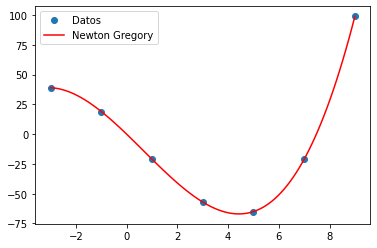

In [6]:
plt.plot(X, Y, "o", label="Datos")
plt.plot(x, y, color="red", label="Newton Gregory")
plt.legend()
plt.show()


In [7]:
x = sym.Symbol('x', Real='True')
y, _ = Newton_gregory(X, Y, x)


In [8]:
y = y.simplify()
y


x*(0.5*x**2 - 1.0*x - 20.5)